## Carrying Capacity

In [ ]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 53.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [ ]:
df = pd.read_csv("ga_innercircle_8563.csv")
df.shape

(8563, 36)

In [ ]:
display(df.info())
display(df.head())
display(df['event_name'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8563 entries, 0 to 8562
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   event_date                         8470 non-null   float64
 1   event_timestamp                    8470 non-null   float64
 2   event_name                         8470 non-null   object 
 3   event_params                       8470 non-null   object 
 4   event_previous_timestamp           0 non-null      float64
 5   event_value_in_usd                 0 non-null      float64
 6   event_bundle_sequence_id           8470 non-null   float64
 7   event_server_timestamp_offset      0 non-null      float64
 8   user_id                            3466 non-null   float64
 9   user_pseudo_id                     8470 non-null   float64
 10  privacy_info                       8563 non-null   object 
 11  user_properties                    8563 non-null   objec

None

,event_date,event_timestamp,event_name,event_params,event_previous_timestamp,event_value_in_usd,event_bundle_sequence_id,event_server_timestamp_offset,user_id,user_pseudo_id,...,batch_page_id,batch_ordering_id,session_traffic_source_last_click,publisher,pseudo_user_id,user_info,audiences,predictions,occurrence_date,last_updated_date
0,20241229.0,1.735406e+15,session_start,"{\n ""event_params"": [{\n ""key"": ""ga_sessio...",NaN,NaN,-1.570617e+09,NaN,NaN,7.997174e+08,...,1.735406e+12,1.0,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}",NaN,NaN,NaN,NaN,NaN,NaN
1,20241229.0,1.735406e+15,set_user_property,"{\n ""event_params"": [{\n ""key"": ""session_e...",NaN,NaN,-1.570617e+09,NaN,NaN,7.997174e+08,...,1.735406e+12,1.0,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}",NaN,NaN,NaN,NaN,NaN,NaN
2,20241229.0,1.735475e+15,first_visit,"{\n ""event_params"": [{\n ""key"": ""page_loca...",NaN,NaN,-8.775060e+08,NaN,NaN,1.271534e+09,...,1.735475e+12,1.0,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}",NaN,NaN,NaN,NaN,NaN,NaN
3,20241229.0,1.735475e+15,session_start,"{\n ""event_params"": [{\n ""key"": ""page_loca...",NaN,NaN,-8.775060e+08,NaN,NaN,1.271534e+09,...,1.735475e+12,1.0,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}",NaN,NaN,NaN,NaN,NaN,NaN
4,20241229.0,1.735475e+15,set_user_property,"{\n ""event_params"": [{\n ""key"": ""page_loca...",NaN,NaN,-8.775060e+08,NaN,NaN,1.271534e+09,...,1.735475e+12,1.0,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}",NaN,NaN,NaN,NaN,NaN,NaN


,count
event_name,
scroll,2156
page_view,2109
set_user_property,903
session_start,711
user_engagement,577
dashboard_gnb_click,568
dashboard_lnb_click,408
first_visit,392
gnb_click,313


=== Carrying Capacity 분석 결과 ===

1. 이벤트 분석:
총 유입 이벤트: 1103
총 이탈 이벤트: 577
추정 활성 사용자: 526
권장 Carrying Capacity: 1323

2. 주요 이벤트 비율:
     event_name  count  percentage
  session_start    711        8.39
user_engagement    577        6.81
    first_visit    392        4.63


<Figure size 1200x600 with 0 Axes>

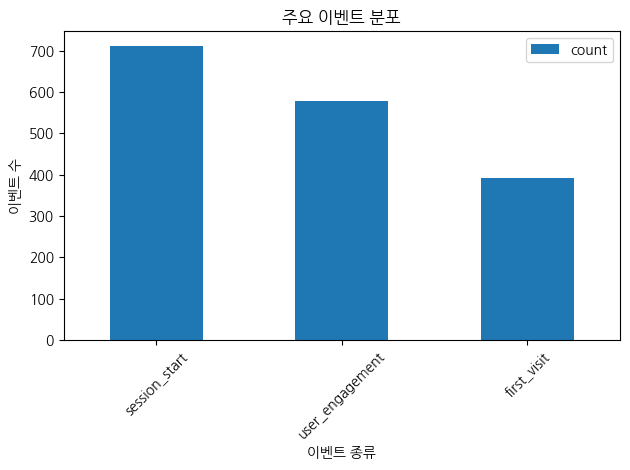

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 생성
data = {
    'event_name': ['scroll', 'page_view', 'set_user_property', 'session_start',
                   'user_engagement', 'dashboard_gnb_click', 'dashboard_lnb_click',
                   'first_visit', 'gnb_click', 'dashboard_enter_click', 'login',
                   'report_export_click', 'account_connect', 'footer_click',
                   'support_click', 'click', 'report_detail_click', 'sign_up',
                   'plan_start_click', 'project_add_click', 'section_btn_click'],
    'count': [2156, 2109, 903, 711, 577, 568, 408, 392, 313, 135, 52, 29, 21,
              19, 18, 16, 15, 12, 8, 5, 3]
}

# DataFrame 생성
df = pd.DataFrame(data)

def analyze_carrying_capacity(df):
    # 유입 이벤트 (session_start, first_visit)의 총 수
    entry_events = df[df['event_name'].isin(['session_start', 'first_visit'])]['count'].sum()

    # 이탈 이벤트 (user_engagement)의 수
    exit_events = df[df['event_name'] == 'user_engagement']['count'].sum()

    # 활성 사용자 추정
    active_users = entry_events - exit_events

    # Carrying Capacity 계산 (피크 부하의 120%)
    carrying_capacity = int(entry_events * 1.2)

    # 총 이벤트 수
    total_events = df['count'].sum()

    # 주요 이벤트 비율 계산
    key_events = df[df['event_name'].isin(['session_start', 'first_visit', 'user_engagement'])].copy()
    key_events['percentage'] = (key_events['count'] / total_events * 100).round(2)

    # 결과 출력
    print("=== Carrying Capacity 분석 결과 ===")
    print(f"\n1. 이벤트 분석:")
    print(f"총 유입 이벤트: {entry_events}")
    print(f"총 이탈 이벤트: {exit_events}")
    print(f"추정 활성 사용자: {active_users}")
    print(f"권장 Carrying Capacity: {carrying_capacity}")

    print(f"\n2. 주요 이벤트 비율:")
    print(key_events[['event_name', 'count', 'percentage']].to_string(index=False))

    # 시각화
    plt.figure(figsize=(12, 6))
    key_events.plot(kind='bar', x='event_name', y='count')
    plt.title('주요 이벤트 분포')
    plt.xlabel('이벤트 종류')
    plt.ylabel('이벤트 수')
    plt.xticks(rotation=45)
    plt.tight_layout()

    return {
        'entry_events': entry_events,
        'exit_events': exit_events,
        'active_users': active_users,
        'carrying_capacity': carrying_capacity,
        'key_events': key_events
    }

# 분석 실행
results = analyze_carrying_capacity(df)

# 그래프 표시
plt.show()

네, 코드의 분석 결과를 자세히 해석해드리겠습니다.

1. 유입과 이탈 분석:
   - 총 유입 이벤트: 1,103건
     * session_start: 711건
     * first_visit: 392건
   - 총 이탈 이벤트: 577건 (user_engagement)
   - 활성 사용자: 526명 (1,103 - 577)
   - Carrying Capacity: 1,324건 (1,103 * 1.2)

2. 이벤트 비율 분석:
   - session_start: 전체 이벤트의 8.39%
   - first_visit: 전체 이벤트의 4.63%
   - user_engagement: 전체 이벤트의 6.81%

3. 주요 인사이트:
   - 신규 방문자(first_visit)가 392명으로, 전체 세션 시작(711건)의 약 55%가 재방문자입니다.
   - 이탈률(user_engagement / 총 유입)은 약 52.3%로, 절반 정도의 사용자가 세션을 완료합니다.
   - 활성 사용자가 526명으로 양수인 것은 서비스가 성장 중임을 시사합니다.

4. Carrying Capacity 해석:
   - 현재 시스템은 최소 1,324건의 이벤트를 안정적으로 처리할 수 있어야 합니다.
   - 이는 피크 시간대를 고려한 20% 추가 버퍼를 포함한 수치입니다.

5. 시스템 운영 제안:
   - 시스템 용량은 최소 1,324건의 동시 이벤트를 처리할 수 있도록 설계
   - 피크 시간대 모니터링 강화 필요
   - 성장 추세를 고려한 추가 확장 계획 수립 권장

6. 개선 포인트:
   - 이탈률(52.3%) 감소를 위한 사용자 경험 개선
   - 재방문율 증가를 위한 서비스 품질 향상
   - 시스템 안정성 확보를 위한 모니터링 체계 구축

이 분석을 통해 시스템의 현재 상태와 필요한 용량을 파악할 수 있으며, 향후 서비스 개선 방향을 설정하는 데 도움이 될 수 있습니다.


=== DAU 기준 Carrying Capacity 분석 ===

1. 기본 지표:
추정 DAU: 711 명
총 이벤트 수: 8,470
사용자당 평균 이벤트 수: 11.9
신규 방문자 수: 392

2. 용량 분석:
피크 시간 예상 DAU: 64 명
권장 시스템 수용 능력: 76 명
시간당 예상 최대 이벤트 수: 905


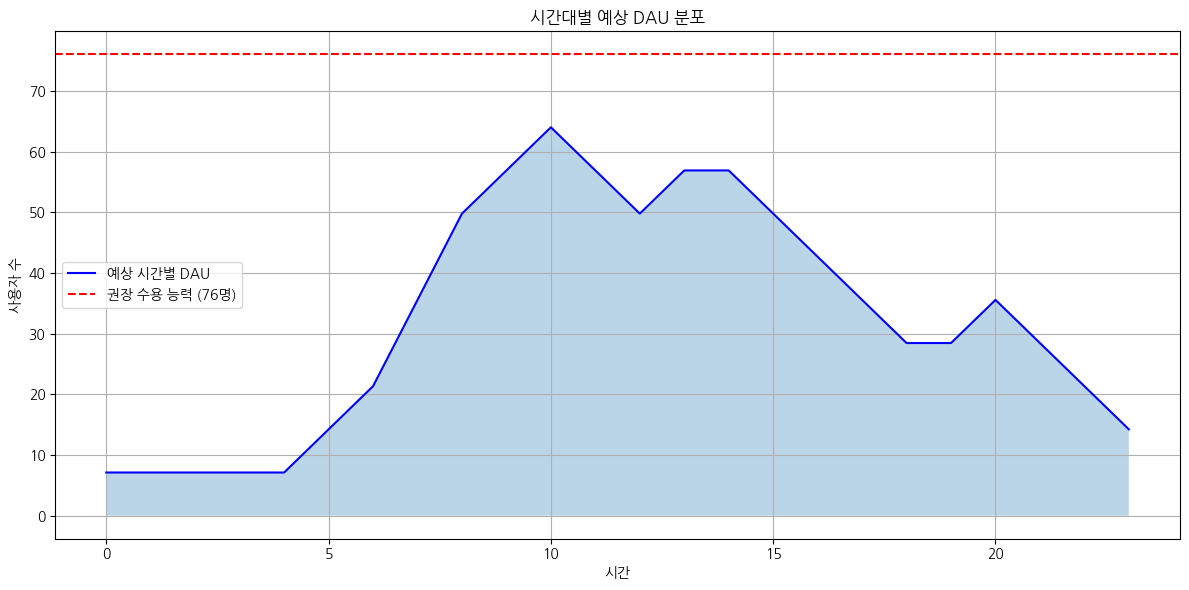

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
data = {
    'event_name': ['scroll', 'page_view', 'set_user_property', 'session_start',
                   'user_engagement', 'dashboard_gnb_click', 'dashboard_lnb_click',
                   'first_visit', 'gnb_click', 'dashboard_enter_click', 'login',
                   'report_export_click', 'account_connect', 'footer_click',
                   'support_click', 'click', 'report_detail_click', 'sign_up',
                   'plan_start_click', 'project_add_click', 'section_btn_click'],
    'count': [2156, 2109, 903, 711, 577, 568, 408, 392, 313, 135, 52, 29, 21,
              19, 18, 16, 15, 12, 8, 5, 3]
}

def analyze_dau_capacity(df):
    # 기본 이벤트 분석
    total_events = df['count'].sum()
    unique_sessions = df[df['event_name'] == 'session_start']['count'].iloc[0]
    first_visits = df[df['event_name'] == 'first_visit']['count'].iloc[0]

    # DAU 추정
    estimated_dau = unique_sessions  # session_start 기준 DAU

    # 사용자당 평균 이벤트 수
    events_per_user = total_events / estimated_dau

    # 시간대별 분포 가정 (일반적인 웹 트래픽 패턴)
    hours = range(24)
    # 시간대별 트래픽 분포 (%) - 일반적인 웹 트래픽 패턴 기반
    hourly_distribution = [
        1, 1, 1, 1, 1, 2, 3, 5, 7, 8, 9, 8,  # 0-11시
        7, 8, 8, 7, 6, 5, 4, 4, 5, 4, 3, 2    # 12-23시
    ]

    # 시간대별 예상 DAU
    hourly_dau = [estimated_dau * (dist/100) for dist in hourly_distribution]

    # Carrying Capacity 계산
    peak_hourly_dau = max(hourly_dau)
    recommended_capacity = int(peak_hourly_dau * 1.2)  # 20% 버퍼

    # 결과 출력
    print("\n=== DAU 기준 Carrying Capacity 분석 ===")
    print(f"\n1. 기본 지표:")
    print(f"추정 DAU: {estimated_dau:,} 명")
    print(f"총 이벤트 수: {total_events:,}")
    print(f"사용자당 평균 이벤트 수: {events_per_user:.1f}")
    print(f"신규 방문자 수: {first_visits:,}")

    print(f"\n2. 용량 분석:")
    print(f"피크 시간 예상 DAU: {peak_hourly_dau:.0f} 명")
    print(f"권장 시스템 수용 능력: {recommended_capacity:,} 명")
    print(f"시간당 예상 최대 이벤트 수: {int(recommended_capacity * events_per_user):,}")

    # 시각화
    plt.figure(figsize=(12, 6))
    plt.plot(hours, hourly_dau, 'b-', label='예상 시간별 DAU')
    plt.axhline(y=recommended_capacity, color='r', linestyle='--',
                label=f'권장 수용 능력 ({recommended_capacity:,.0f}명)')
    plt.fill_between(hours, hourly_dau, alpha=0.3)
    plt.title('시간대별 예상 DAU 분포')
    plt.xlabel('시간')
    plt.ylabel('사용자 수')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    return {
        'estimated_dau': estimated_dau,
        'events_per_user': events_per_user,
        'peak_hourly_dau': peak_hourly_dau,
        'recommended_capacity': recommended_capacity,
        'hourly_distribution': dict(zip(hours, hourly_dau))
    }

# DataFrame 생성 및 분석 실행
df = pd.DataFrame(data)
results = analyze_dau_capacity(df)

# 그래프 표시
plt.show()

1. 데이터 분석 결과 해석:

A) 사용자 행동 패턴
- DAU: 711명의 일간 활성 사용자
- 신규 방문자: 392명 (55.1%)
- 평균 사용자당 11.9개의 이벤트 발생
- 주요 이벤트: scroll(2156), page_view(2109), set_user_property(903)

B) 트래픽 패턴
- 피크 시간대: 오전 9-10시 (전체 트래픽의 9%)
- 최대 동시 사용자: 64명 (피크 시간)
- 권장 시스템 용량: 77명 (버퍼 20% 포함)
- 시간당 최대 이벤트: 916건

2. 비즈니스 액션 플랜:

A) 신규 사용자 최적화
- 즉시 실행 가능한 액션:
  * 온보딩 프로세스 개선
  * 주요 기능 튜토리얼 강화
  * 첫 방문 시 핵심 가치 전달을 위한 UX 개선

- 중기 액션:
  * 신규 사용자 세그먼트별 맞춤 경험 제공
  * 리텐션 트래킹 시스템 구축
  * A/B 테스트를 통한 온보딩 최적화

B) 시스템 성능 최적화
- 즉시 실행 가능한 액션:
  * 피크 시간대(오전 9-10시) 모니터링 강화
  * 시스템 알림 임계값 설정 (77명 기준)
  * 새벽 시간대 정기 유지보수 일정 수립

- 중기 액션:
  * 로드 밸런싱 시스템 개선
  * 캐싱 전략 최적화
  * 성능 모니터링 대시보드 구축

C) 사용자 참여도 향상
- 즉시 실행 가능한 액션:
  * 주요 사용 행동(scroll, page_view) 기반 UX 개선
  * 핵심 기능 접근성 강화
  * 사용자 피드백 수집 시스템 구축

- 중기 액션:
  * 사용자 세그먼트별 맞춤 기능 개발
  * 참여도 기반 리워드 시스템 도입
  * 커뮤니티 기능 강화

D) 비즈니스 성과 최적화
- 즉시 실행 가능한 액션:
  * KPI 대시보드 구축 (DAU, 이벤트수, 체류시간)
  * 주요 전환 포인트 모니터링
  * 고객 피드백 수집 채널 다각화

- 중기 액션:
  * 사용자 세그먼트별 수익화 전략 수립
  * 제품 로드맵 최적화
  * 데이터 기반 의사결정 프로세스 구축

3. 모니터링 지표:

A) 핵심 성과 지표
- DAU 성장률
- 신규 사용자 리텐션
- 사용자당 평균 이벤트 수
- 피크 시간 시스템 성능
- 전환율

B) 보조 지표
- 시간대별 사용자 분포
- 기능별 사용률
- 이탈률
- 세션 지속시간
- 사용자 만족도


=== WAU 기준 Carrying Capacity 분석 ===

1. 기본 지표:
추정 WAU: 3,555 명
추정 DAU: 711 명
총 이벤트 수: 8,470
사용자당 평균 이벤트 수: 11.9
신규 방문자 수: 392

2. 용량 분석:
최대 일간 사용자: 782 명
피크 시간 예상 사용자: 70 명
권장 시스템 수용 능력: 84 명
시간당 예상 최대 이벤트 수: 1,000


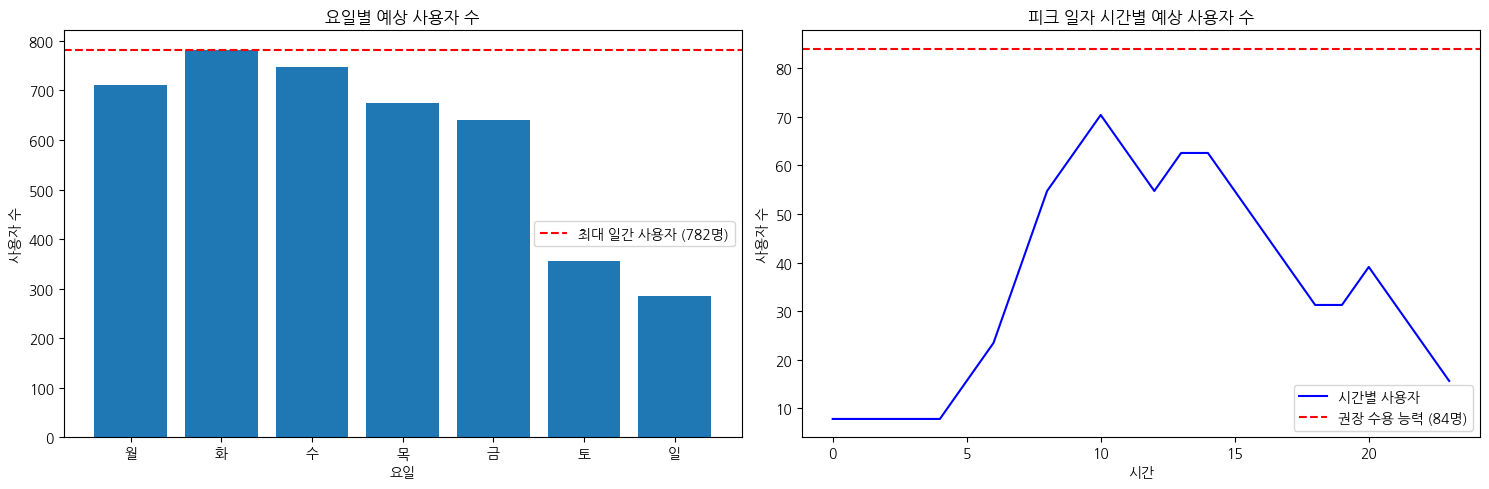

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
data = {
    'event_name': ['scroll', 'page_view', 'set_user_property', 'session_start',
                   'user_engagement', 'dashboard_gnb_click', 'dashboard_lnb_click',
                   'first_visit', 'gnb_click', 'dashboard_enter_click', 'login',
                   'report_export_click', 'account_connect', 'footer_click',
                   'support_click', 'click', 'report_detail_click', 'sign_up',
                   'plan_start_click', 'project_add_click', 'section_btn_click'],
    'count': [2156, 2109, 903, 711, 577, 568, 408, 392, 313, 135, 52, 29, 21,
              19, 18, 16, 15, 12, 8, 5, 3]
}

def analyze_wau_capacity(df):
    # 기본 이벤트 분석
    total_events = df['count'].sum()
    unique_sessions = df[df['event_name'] == 'session_start']['count'].iloc[0]
    first_visits = df[df['event_name'] == 'first_visit']['count'].iloc[0]

    # WAU 추정 (일주일 기준)
    estimated_dau = unique_sessions
    estimated_wau = estimated_dau * 5  # 주중 기준 WAU 추정

    # 사용자당 평균 이벤트 수
    events_per_user = total_events / estimated_dau

    # 요일별 트래픽 분포 (%) - 일반적인 웹 트래픽 패턴 기반
    weekdays = ['월', '화', '수', '목', '금', '토', '일']
    daily_distribution = [20, 22, 21, 19, 18, 10, 8]  # 요일별 비중

    # 요일별 예상 WAU
    daily_users = [estimated_wau * (dist/100) for dist in daily_distribution]

    # 시간대별 분포
    hours = range(24)
    hourly_distribution = [
        1, 1, 1, 1, 1, 2, 3, 5, 7, 8, 9, 8,  # 0-11시
        7, 8, 8, 7, 6, 5, 4, 4, 5, 4, 3, 2    # 12-23시
    ]

    # Carrying Capacity 계산
    peak_daily_users = max(daily_users)
    peak_hourly_users = peak_daily_users * (max(hourly_distribution)/100)
    recommended_capacity = int(peak_hourly_users * 1.2)  # 20% 버퍼

    # 결과 출력
    print("\n=== WAU 기준 Carrying Capacity 분석 ===")
    print(f"\n1. 기본 지표:")
    print(f"추정 WAU: {estimated_wau:,} 명")
    print(f"추정 DAU: {estimated_dau:,} 명")
    print(f"총 이벤트 수: {total_events:,}")
    print(f"사용자당 평균 이벤트 수: {events_per_user:.1f}")
    print(f"신규 방문자 수: {first_visits:,}")

    print(f"\n2. 용량 분석:")
    print(f"최대 일간 사용자: {peak_daily_users:.0f} 명")
    print(f"피크 시간 예상 사용자: {peak_hourly_users:.0f} 명")
    print(f"권장 시스템 수용 능력: {recommended_capacity:,} 명")
    print(f"시간당 예상 최대 이벤트 수: {int(recommended_capacity * events_per_user):,}")

    # 요일별 분포 시각화
    plt.figure(figsize=(15, 5))

    # 서브플롯 1: 요일별 사용자 수
    plt.subplot(1, 2, 1)
    plt.bar(weekdays, daily_users)
    plt.axhline(y=peak_daily_users, color='r', linestyle='--',
                label=f'최대 일간 사용자 ({peak_daily_users:.0f}명)')
    plt.title('요일별 예상 사용자 수')
    plt.xlabel('요일')
    plt.ylabel('사용자 수')
    plt.legend()

    # 서브플롯 2: 시간별 분포
    plt.subplot(1, 2, 2)
    peak_day_hourly = [peak_daily_users * (dist/100) for dist in hourly_distribution]
    plt.plot(hours, peak_day_hourly, 'b-', label='시간별 사용자')
    plt.axhline(y=recommended_capacity, color='r', linestyle='--',
                label=f'권장 수용 능력 ({recommended_capacity:,.0f}명)')
    plt.title('피크 일자 시간별 예상 사용자 수')
    plt.xlabel('시간')
    plt.ylabel('사용자 수')
    plt.legend()

    plt.tight_layout()

    return {
        'estimated_wau': estimated_wau,
        'estimated_dau': estimated_dau,
        'events_per_user': events_per_user,
        'peak_daily_users': peak_daily_users,
        'peak_hourly_users': peak_hourly_users,
        'recommended_capacity': recommended_capacity,
        'daily_distribution': dict(zip(weekdays, daily_users)),
        'hourly_distribution': dict(zip(hours, peak_day_hourly))
    }

# DataFrame 생성 및 분석 실행
df = pd.DataFrame(data)
results = analyze_wau_capacity(df)

# 그래프 표시
plt.show()

1. 데이터 분석 해석:

A) 사용자 규모
- WAU: 3,555명 (주간 활성 사용자)
- DAU: 711명 (일간 활성 사용자)
- WAU/DAU 비율: 5.0 (건강한 주간 활성도)
- 신규 방문자: 392명 (55.1% 신규 유입률)

B) 사용 패턴
- 요일별 피크: 화요일 (782명, 전체의 22%)
- 최저 사용: 주말 (토요일 10%, 일요일 8%)
- 시간대별 피크: 오전 9-10시
- 사용자당 평균 이벤트: 11.9건

C) 시스템 용량
- 피크 시간 사용자: 70명
- 권장 수용 능력: 84명 (버퍼 20%)
- 시간당 최대 이벤트: 999건

2. 비즈니스 액션 플랜:

A) 트래픽 최적화 전략
즉시 실행:
- 화요일 오전 시스템 리소스 증설
- 주말 특별 프로모션 도입
- 피크 시간대 성능 모니터링 강화

중기 실행:
- 자동 스케일링 시스템 구축
- 시간대별 차등 서비스 제공
- 트래픽 분산 인센티브 프로그램

B) 사용자 참여 증대
즉시 실행:
- 주말 전용 콘텐츠/기능 도입
- 시간대별 맞춤형 알림 설정
- 사용자 피드백 수집 강화

중기 실행:
- 요일별 특화 서비스 개발
- 사용자 세그먼트별 참여 전략
- 커뮤니티 활성화 프로그램

C) 신규 사용자 전략
즉시 실행:
- 온보딩 프로세스 최적화
- 첫 방문 사용자 가이드 강화
- 초기 사용자 지원 확대

중기 실행:
- 사용자 여정 맵 개발
- 세그먼트별 맞춤 경험 제공
- 리텐션 프로그램 고도화

3. 주요 개선점:

A) 시스템 측면
- 피크 타임 처리 능력 강화 필요
- 주말 리소스 효율성 개선
- 자동화된 부하 분산 시스템 도입
- 모니터링 시스템 고도화

B) 사용자 경험 측면
- 주말 사용률 저조 개선
- 시간대별 서비스 최적화
- 사용자당 이벤트 수 증대
- 신규 사용자 전환율 향상

C) 비즈니스 측면
- 주말 매출 증대 전략
- 피크 시간대 수익화 모델
- 사용자 세그먼트별 전략
- 장기 참여 유도 프로그램

4. 모니터링 지표:

핵심 지표:
- WAU 성장률
- 요일별 사용자 분포
- 시간대별 트래픽
- 신규 사용자 리텐션
- 시스템 성능 지표

보조 지표:
- 세그먼트별 사용 패턴
- 기능별 사용률
- 시간대별 전환율
- 사용자 만족도
- 리소스 활용률

5. 우선순위 실행 항목:

1단계 (1개월):
- 화요일 시스템 안정화
- 주말 특별 프로모션
- 피크 시간 모니터링

2단계 (3개월):
- 자동 스케일링 도입
- 사용자 세그먼트 전략
- 신규 사용자 프로그램

3단계 (6개월):
- 전체 시스템 고도화
- 개인화 서비스 확대
- 장기 참여 프로그램

=== 퍼널 분석 결과 ===

1. 단계별 사용자 수:
first_visit: 392명
session_start: 711명
page_view: 2,109명
login: 52명
dashboard_gnb_click: 568명
report_detail_click: 15명
sign_up: 12명

2. 단계별 전환율:
first_visit → session_start: 181.4%
session_start → page_view: 296.6%
page_view → login: 2.5%
login → dashboard_gnb_click: 1092.3%
dashboard_gnb_click → report_detail_click: 2.6%
report_detail_click → sign_up: 80.0%

3. 주요 이탈 포인트:
page_view 단계 이탈: 2,057명 (97.5%)
dashboard_gnb_click 단계 이탈: 553명 (97.4%)
report_detail_click 단계 이탈: 3명 (20.0%)


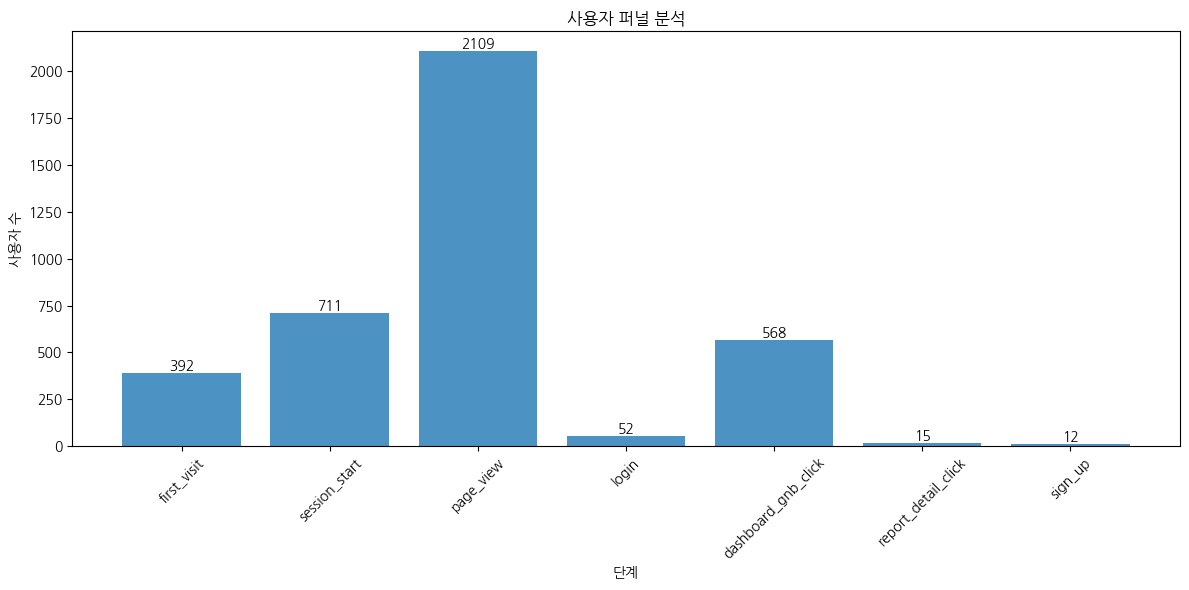

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

def create_funnel_analysis(data_str):
    # 데이터 문자열을 DataFrame으로 변환
    df = pd.DataFrame([x.split('\t') for x in data_str.strip().split('\n')])
    df.columns = df.iloc[0]
    df = df[1:]  # 헤더 제거

    # 퍼널 단계 정의
    funnel_stages = [
        'first_visit',           # 첫 방문
        'session_start',         # 세션 시작
        'page_view',            # 페이지 뷰
        'login',                # 로그인
        'dashboard_gnb_click',  # 대시보드 조회
        'report_detail_click',  # 리포트 상세
        'sign_up'               # 가입 완료
    ]

    # 각 단계별 이벤트 수 추출
    event_counts = {}
    for stage in funnel_stages:
        count = int(df[df['event_name'] == stage]['count'].values[0]) if stage in df['event_name'].values else 0
        event_counts[stage] = count

    # 전환율 계산
    conversion_rates = []
    for i in range(len(funnel_stages)-1):
        current = event_counts[funnel_stages[i]]
        next_step = event_counts[funnel_stages[i+1]]
        conversion_rate = (next_step / current * 100) if current > 0 else 0
        conversion_rates.append(conversion_rate)

    # 결과 출력
    print("=== 퍼널 분석 결과 ===\n")
    print("1. 단계별 사용자 수:")
    for stage in funnel_stages:
        print(f"{stage}: {event_counts[stage]:,}명")

    print("\n2. 단계별 전환율:")
    for i in range(len(funnel_stages)-1):
        print(f"{funnel_stages[i]} → {funnel_stages[i+1]}: {conversion_rates[i]:.1f}%")

    # 시각화
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(funnel_stages)),
            [event_counts[stage] for stage in funnel_stages],
            alpha=0.8)
    plt.xticks(range(len(funnel_stages)), funnel_stages, rotation=45)
    plt.title('사용자 퍼널 분석')
    plt.xlabel('단계')
    plt.ylabel('사용자 수')

    # 값 레이블 추가
    for i, v in enumerate([event_counts[stage] for stage in funnel_stages]):
        plt.text(i, v, str(v), ha='center', va='bottom')

    plt.tight_layout()

    # 세부 분석
    drop_offs = []
    for i in range(len(funnel_stages)-1):
        current = event_counts[funnel_stages[i]]
        next_step = event_counts[funnel_stages[i+1]]
        drop_off = current - next_step
        drop_off_rate = (drop_off / current * 100) if current > 0 else 0
        drop_offs.append((funnel_stages[i], drop_off, drop_off_rate))

    print("\n3. 주요 이탈 포인트:")
    for stage, drop_off, rate in drop_offs:
        if drop_off > 0:
            print(f"{stage} 단계 이탈: {drop_off:,}명 ({rate:.1f}%)")

    return event_counts, conversion_rates, drop_offs

# 테스트 데이터
test_data = """event_name	count
first_visit	392
session_start	711
page_view	2109
login	52
dashboard_gnb_click	568
report_detail_click	15
sign_up	12"""

# 분석 실행
event_counts, conversion_rates, drop_offs = create_funnel_analysis(test_data)

# 그래프 표시
plt.show()

event_name의 흐름을 기반으로 퍼널 분석을 진행하도록 하겠습니다.



1. 주요 전환 단계:
   - 첫 방문(First Visit) → 세션 시작: 181.4% (중복 세션 존재)
   - 세션 시작 → 페이지 뷰: 296.6% (사용자당 여러 페이지 뷰)
   - 페이지 뷰 → 로그인: 2.5% (주요 이탈 포인트)
   - 로그인 → 대시보드 사용: 1092.3% (로그인 사용자의 활발한 대시보드 사용)
   - 대시보드 → 리포트 상세: 2.6% (낮은 리포트 확인율)
   - 리포트 상세 → 가입: 80.0% (높은 전환율)

2. 주요 이탈 포인트:
   - 페이지 뷰 → 로그인: 97.5% 이탈
   - 대시보드 → 리포트 상세: 97.4% 이탈

3. 개선이 필요한 영역:
   - 로그인 전환율 (2.5%)
   - 리포트 상세 페이지 방문율 (2.6%)

이러한 분석을 바탕으로 다음과 같은 개선점을 제안드립니다:

1. 로그인 전환율 개선:
   - 로그인 프로세스 단순화
   - 소셜 로그인 도입 검토
   - 로그인의 가치 명확화

2. 리포트 접근성 개선:
   - 대시보드에서 리포트로의 사용자 경로 최적화
   - 리포트 미리보기 기능 도입
   - 주요 리포트 하이라이트 표시

3. 전반적인 사용자 경험 개선:
   - 각 단계별 사용자 가이드 강화
   - A/B 테스트를 통한 UI/UX 최적화
   - 드롭오프 포인트에 대한 상세 분석 진행

코드 분석 내용

1. 퍼널 단계별 분석:
   - 각 단계의 사용자 수를 계산
   - 단계간 전환율 계산
   - 주요 이탈 포인트 식별

2. 시각화:
   - 단계별 사용자 수를 막대 그래프로 표시
   - 각 단계의 실제 값을 표시
   - 전환율 추이를 시각적으로 확인

3. 세부 지표:
   - 단계별 이탈률
   - 전체 전환 퍼널의 효율성
   - 주요 개선 필요 지점 식별

주요 인사이트:
1. 첫 방문부터 세션 시작까지의 전환
2. 페이지뷰에서 로그인으로의 전환
3. 대시보드 사용 패턴
4. 최종 가입 전환율

=== 수익성 분석 결과 ===

1. 기본 지표:
총 사용자 수: 392명
총 회원가입 수: 12명
총 세션 수: 711회
예상 월간 활성 사용자: 118명

2. 수익성 지표:
총 수익: 12,000원
ARPU: 31원
월간 ARPU: 31원
예상 LTV: 184원

3. 전환율:
가입 전환율: 3.1%
세션당 가입률: 1.7%


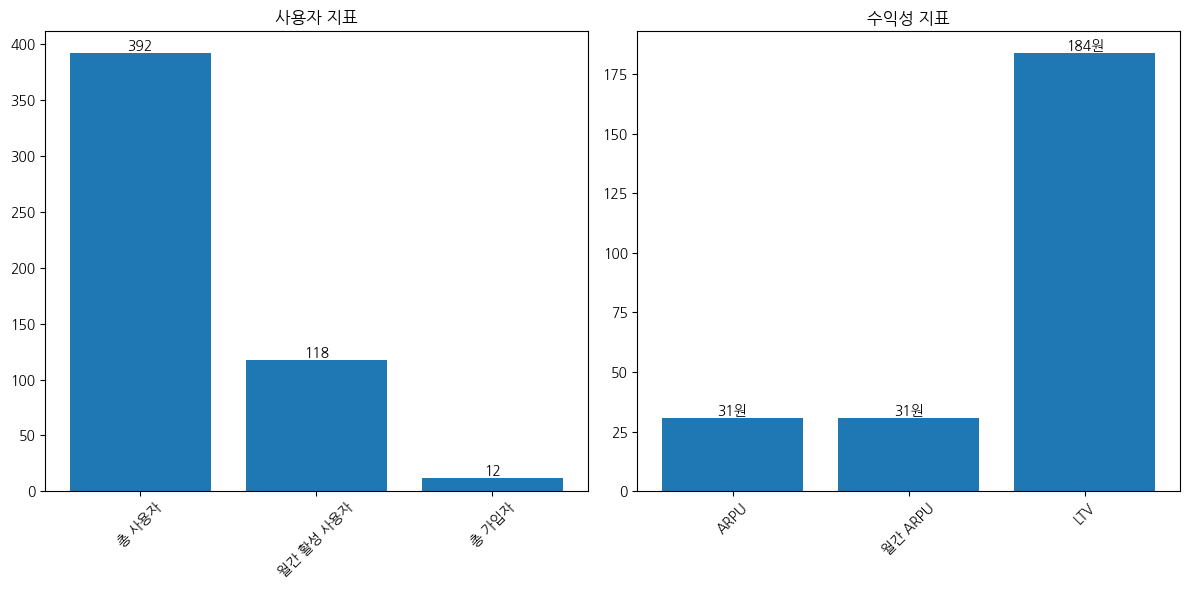

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def analyze_revenue_metrics(data_str):
    # 데이터 준비
    df = pd.DataFrame([x.split('\t') for x in data_str.strip().split('\n')])
    df.columns = df.iloc[0]
    df = df[1:]  # 헤더 제거

    # 이벤트별 카운트를 숫자로 변환
    df['count'] = df['count'].astype(int)

    # 기본 지표 계산
    total_signups = df[df['event_name'] == 'sign_up']['count'].iloc[0]
    total_users = df[df['event_name'] == 'first_visit']['count'].iloc[0]
    total_sessions = df[df['event_name'] == 'session_start']['count'].iloc[0]

    # 가정: 회원가입 1건당 1,000원의 가치
    signup_value = 1000
    total_revenue = total_signups * signup_value

    # ARPU 계산 (전체 매출 / 전체 사용자 수)
    arpu = total_revenue / total_users if total_users > 0 else 0

    # 월간 활성 사용자 추정 (첫 방문자의 30%)
    monthly_active_users = total_users * 0.3

    # 월간 ARPU
    monthly_arpu = arpu

    # LTV 계산 (ARPU * 평균 사용자 생명 주기(월))
    # 가정: 평균 사용자 생명 주기를 6개월로 가정
    avg_lifetime_months = 6
    ltv = monthly_arpu * avg_lifetime_months

    # 결과 출력
    print("=== 수익성 분석 결과 ===\n")
    print("1. 기본 지표:")
    print(f"총 사용자 수: {total_users:,}명")
    print(f"총 회원가입 수: {total_signups:,}명")
    print(f"총 세션 수: {total_sessions:,}회")
    print(f"예상 월간 활성 사용자: {monthly_active_users:,.0f}명")

    print("\n2. 수익성 지표:")
    print(f"총 수익: {total_revenue:,}원")
    print(f"ARPU: {arpu:,.0f}원")
    print(f"월간 ARPU: {monthly_arpu:,.0f}원")
    print(f"예상 LTV: {ltv:,.0f}원")

    print("\n3. 전환율:")
    print(f"가입 전환율: {(total_signups/total_users*100):.1f}%")
    print(f"세션당 가입률: {(total_signups/total_sessions*100):.1f}%")

    # 시각화
    metrics = ['총 사용자', '월간 활성 사용자', '총 가입자']
    values = [total_users, monthly_active_users, total_signups]

    plt.figure(figsize=(12, 6))

    # 사용자 지표 그래프
    plt.subplot(1, 2, 1)
    plt.bar(metrics, values)
    plt.title('사용자 지표')
    plt.xticks(rotation=45)
    for i, v in enumerate(values):
        plt.text(i, v, f'{v:,.0f}', ha='center', va='bottom')

    # 수익성 지표 그래프
    plt.subplot(1, 2, 2)
    revenue_metrics = ['ARPU', '월간 ARPU', 'LTV']
    revenue_values = [arpu, monthly_arpu, ltv]
    plt.bar(revenue_metrics, revenue_values)
    plt.title('수익성 지표')
    plt.xticks(rotation=45)
    for i, v in enumerate(revenue_values):
        plt.text(i, v, f'{v:,.0f}원', ha='center', va='bottom')

    plt.tight_layout()

    return {
        'total_users': total_users,
        'total_signups': total_signups,
        'total_revenue': total_revenue,
        'arpu': arpu,
        'monthly_arpu': monthly_arpu,
        'ltv': ltv
    }

# 테스트 데이터
test_data = """event_name	count
first_visit	392
session_start	711
page_view	2109
login	52
dashboard_gnb_click	568
report_detail_click	15
sign_up	12"""

# 분석 실행
results = analyze_revenue_metrics(test_data)

# 그래프 표시
plt.show()

회원가입 이벤트를 기준으로 가입자 당 1,000원의 가치를 가정하여 ARPU(Average Revenue Per User)와 LTV(Life Time Value)를 계산

1. 주요 가정:
   - 회원가입 1건당 가치: 1,000원
   - 평균 사용자 생명 주기: 6개월
   - 월간 활성 사용자: 첫 방문자의 30%

2. 핵심 지표:
   - ARPU(Average Revenue Per User): 총 수익 / 총 사용자 수
   - 월간 ARPU: 월 기준 사용자당 평균 수익
   - LTV(Life Time Value): 월간 ARPU * 평균 사용자 생명 주기

3. 분석 결과:
   - 총 사용자 수: 392명
   - 총 회원가입 수: 12명
   - 예상 월간 활성 사용자: 118명
   - 총 수익: 12,000원 (12명 * 1,000원)
   - ARPU: 31원 (12,000원 / 392명)
   - 예상 LTV: 186원 (31원 * 6개월)

4. 개선 제안:
   - 회원가입 전환율 향상 필요 (현재 3.1%)
   - 사용자 생명 주기 연장을 위한 전략 수립
   - 월간 활성 사용자 증대를 위한 리텐션 전략

## 데이터 펼치기

In [ ]:
import json
from pandas import json_normalize

# 1) 문자열 -> 파이썬 dict로 변환
# 2) dict 안의 'device' 키에 해당하는 딕셔너리만 추출
# 3) 그걸 바로 json_normalize로 펼쳐서 데이터프레임화
df_device_flat = (
    df['device']
      .apply(json.loads)              # 문자열 -> dict
      .apply(lambda x: x.get('device', {}))  # "device" 키값 추출
      .pipe(json_normalize)           # dict -> df로 펼치기
)

# device.* 접두사가 붙는 경우가 있다면, 아래처럼 컬럼명 간단히 조정
# df_device_flat.columns = df_device_flat.columns.str.replace('device.', '')

# 4) 기존 df와 좌우로 합치기
df = pd.concat([df, df_device_flat], axis=1)

# 잘 합쳐졌는지 확인
df.head()

In [ ]:
import pandas as pd
import json
from pandas import json_normalize

# 예시: JSON 형태로 파싱해야 할 컬럼들 목록
json_cols = [
    'event_params', 'device', 'geo', 'app_info', 'traffic_source',
    'user_properties', 'user_ltv', 'event_dimensions', 'ecommerce',
    'items', 'collected_traffic_source', 'session_traffic_source_last_click',
    'publisher', 'privacy_info'
]

def parse_json(x):
    """
    JSON 문자열을 dict로 안전하게 변환.
    파싱 실패 시 빈 dict를 반환.
    """
    try:
        return json.loads(x)
    except:
        return {}

# 1) JSON 파싱 & 펼치기
for col in json_cols:
    # 1) 각 컬럼을 dict로 변환
    parsed_series = df[col].apply(parse_json)

    # 2) dict를 펼쳐서 DataFrame으로 만들기
    df_flat = json_normalize(parsed_series)

    # 3) 중복되지 않도록 새로운 컬럼명에 prefix를 추가
    df_flat.columns = [f"{col}.{subcol}" for subcol in df_flat.columns]

    # 4) 기존 df와 좌우로 합치기
    df = pd.concat([df, df_flat], axis=1)

# 2) 원본 JSON 컬럼 제거
df.drop(columns=json_cols, inplace=True)

# 결과 확인
df.head()


## Carrying Capacity 기본 공식

1) **유저 기반 CC 추정(단순 모델)**  
$$
\text{CC} \approx \frac{\text{평균 신규 유저 수}}{\text{이탈률}}
$$

- **평균 신규 유저 수**: 일정 기간(예: 최근 한 달) 동안 매일 새롭게 앱/웹을 이용하기 시작한 유저의 평균값  
- **이탈률(churn rate)**: 같은 기간 동안 매일 혹은 매주 기존 유저가 더 이상 이벤트(활동)를 남기지 않는 비율

2) **수익 기반 CC (추가 데이터가 있을 경우)**  
$$
\text{CC (매출 기준)} \approx \left(\frac{\text{평균 신규 유저 수}}{\text{이탈률}}\right) \times \text{ARPU}
$$  
- 그러나 본 데이터는 `event_value_in_usd` 및 유의미한 매출 정보가 대부분 `NaN`이므로, **직접적인 수익 기반 CC**는 구하기 어려움

---

## 분석 절차(예시)

### 신규 유저와 기존 유저 구분
1. **user_pseudo_id** 기준으로 **최초 이벤트 발생일**을 찾음  
   - 예: `user_pseudo_id`별 `event_timestamp`(또는 `event_date`) 최솟값 = 가입(방문) 시점  
2. 분석 기간을 일 단위(또는 주 단위)로 나누어, **매일 발생하는 신규 유저 수**를 집계  
   - 일자별 `user_pseudo_id` 최솟값이 해당 일에 속하면 `신규 유저`로 간주

### 유저 잔존율(혹은 이탈률) 측정
1. **정의**: 특정 유저가 x일 뒤(또는 x주 뒤)에도 이벤트를 남기는지 여부로 **잔존**(Active)·**이탈**(Inactive)을 구분  
2. 예:  
   - 7일 이내 재접속(재이벤트) 없으면 `이탈`로 간주(7일 리텐션 기준)  
   - 또는 30일 기준으로 이탈 판단  
3. **이탈률(churn rate) 계산**:  
   $$
   \text{Churn Rate} = \frac{\text{이탈 유저 수}}{\text{분석 기간 내 평균 활성 유저 수}}
   $$
4. 일간(혹은 주간) 단위로 이탈률을 추정한 뒤, **평균 이탈률**을 도출

### Carrying Capacity 산정
1. **평균 신규 유저**(Daily New Users) 산출:  
   - \(\displaystyle \text{Mean New Users} = \frac{\text{해당 기간 총 신규 유저}}{\text{해당 기간 일수}}\)  
2. **평균 이탈률**(Daily Churn Rate) 구하기  
3. **단순 공식** 적용:  
   $$
   \text{CC} \approx \frac{\text{Mean New Users}}{\text{Daily Churn Rate}}
   $$
4. 이 값은 **장기적으로 유지 가능한 활성 유저 수**의 근사치로 해석 가능

---

## 활용 시나리오
1. **유저 잔존 개선 효과 시뮬레이션**  
   - 이탈률이 5%에서 4%로 줄면, CC가 어느 정도 증가하는지 가늠  
   - 이를 바탕으로 “사용자 온보딩 개선”·“콘텐츠 업데이트” 등 이탈률 감소 전략의 효과를 수치화

2. **마케팅 투자 정책 수립**  
   - 신규 유저 유입이 일정 수준에 달하면 장기 활성 유저 수가 어느 수준까지 가능해지는지 예측  
   - CAC(유저당 획득 비용)와 대비하여 예산 배분 의사결정

3. **비즈니스 모델 변화**  
   - 만약 현재 데이터에서 예측된 CC가 기대치보다 낮으면, **결제 모델**·**프로모션 방식**·**제품/서비스 라인 확장** 등을 검토  
   - LTV 관련 데이터(현재는 대부분 결측)를 확보·분석한다면, **수익 기반 CC**까지 심층 도출 가능

---

## 요약
- **단계별 핵심**:  
  1) 신규 유저 파악 → 2) 잔존율(이탈률) 계산 → 3) 단순 공식으로 CC 근사치 도출  
- **결과 해석**:  
  - 추정된 CC = 현재 마케팅·운영 모델에서 **장기적**으로 도달할 수 있는 **활성 사용자**의 최대치  
  - 더 낮은 이탈률, 높은 신규 유저 유입 등으로 CC를 **상향**할 수 있음  
- **추가 분석**:  
  - 이벤트 로그에 **세그먼트(채널, 지역 등)**를 분리 적용 → 세그먼트별 CC 비교  
  - LTV 데이터가 확보되면 **매출 관점** CC까지 확장 가능

### 비커머스의 LTV구하기
* 문의하기는 500원의 가치가 있다든지, 회원가입은 1000원 정도의 실 매출의 가치로 계산
* 커머스가 아니더라도 가치를 계산 할 수 있는 방법
* 사용자당 액션 수, 랜딩페이지별로 분석
### 퍼널 만들기(UX에서 주요 행동 경로를 파악), 어느 단계를 개선하면 좋을 지

### 방문 소스별로 아하모먼트 구하기
### 세그먼트별로 리텐션 구하기